In [99]:
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
plt.rcParams["font.size"] = 14
plt.rcParams["figure.dpi"] = 350
plt.rcParams["lines.markersize"] = 5
plt.rcParams['lines.marker'] = 's'
plt.rcParams['axes.formatter.use_mathtext'] = True
def get_vs_ncores(nfiles, ncores_range=range(8, 65, 8), labels = ['O3', 'coffea'], subdir=''):
#     plt.style.use('_mpl-gallery')
    
    colors = ['r', 'g', 'b']
    colors = {labels[i]:colors[i] for i in range(len(labels))}
    
    fig, ax = plt.subplots(1,2, figsize=(12,5))
    timeax = ax[0]
    ramax = ax[1]
    
    fig_rate, axs = plt.subplots(1,2, figsize=(12,5)) 
    ax_rate = axs[0]
    ax_file = axs[1]
    
    n = ncores_range
    nevts = []
    nfiles_tot = []
    
    for label in labels:
        
        t = []  
        ram = []
        for ncores in n:
            path = f'benchmarks/{subdir}{nfiles}/{label}/{ncores}/*'
            files = glob.glob(path)
            time = []
            rss = []
            
            for i in range(len(files)):
                file = files[i]
                
                with open(file, 'r') as f:
                
                    if i == 0 and label=='O3':
                        for l in f.readlines():

                            if 'Total number of events:' in l:
                                val = int(l.split()[-1])
                                nevts.append(val)
                            if 'Total number of files:' in l:
                                val = int(l.split()[-1])    
                                nfiles_tot.append(val)   
                            
                    if 'coffea' in label:
                        if 'rss' in file:
                            line = f.readline()
                            val = line.split()[0]
                            rss.append(float(val))
                        else:
                            for line in f.readlines():
                                if 'execution took' in line:  
                                    val = line.split()[2]
                                    time.append(float(val))
                    else:
                        for line in f.readlines():
                            if 'RunGraphs' in line and 'elapsed' in line:
                                val = float(line.split()[-2][0:-1])
                                time.append(val)
                            if 'maxresident' in line:
                                val = int(line.split()[-1].split('maxresident')[0])#/100000
                                rss.append(val)
                        
            t.append(time); ram.append(rss)

        t = np.array(t); ram = np.array(ram)/1e6

        timeax.errorbar(n, np.mean(t, axis=1), yerr=np.std(t, axis=1), label = label, linestyle='', color=colors[label], capsize=5)
        ramax.errorbar(n, np.mean(ram, axis=1), yerr=np.std(ram, axis=1), label = label, linestyle='', color=colors[label],linewidth=0.7, capsize=5)
        
        
        rate = np.array(nevts)[:,None]/np.array(n)[:,None]/t
        ax_rate.errorbar(n, np.mean(rate, axis=1), yerr=np.std(rate, axis=1), label = label, linestyle='', color=colors[label], capsize=5)
        rate = np.array(nfiles_tot)[:,None]/np.array(n)[:,None]/t
        ax_file.errorbar(n, np.mean(rate, axis=1), yerr=np.std(rate, axis=1), label = label, linestyle='', color=colors[label], capsize=5)
        
        
    timeax.set_xlabel('Number of cores')
    timeax.set_ylabel('t [s]')
    timeax.grid()
    timeax.set_xticks(n)
#     ax[0].set_yticks(list(range(0, 1100, 100)))
    #ax[0].yaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=False))
    timeax.legend()
    timeax.set_title(f'time at {nfiles} files per sample', fontsize=14, x=0.5, y=1.03)
    timeax.set_ylim(0, 900)
 
    ax_rate.set_xlabel('Number of cores')
    ax_rate.set_ylabel('rate of events [Hz]')
    ax_rate.grid()
    ax_rate.set_xticks(n)
    ax_rate.legend()
    ax_rate.set_title(f'rate at {nfiles} files per sample', fontsize=14, x=0.5, y=1.03)
    ax_rate.set_ylim(0, 25*1e4)

    
    ramax.set_xlabel('Number of cores')
    ramax.set_ylabel('RAM [G]')
    ramax.grid()
    ramax.set_xticks(n)
    ramax.legend()
    ramax.set_title(f'RAM at {nfiles} files per sample', fontsize=14, x=0.5, y=1.03)
    ramax.set_ylim(0, 50)

    ax_file.set_xlabel('Number of cores')
    ax_file.set_ylabel('rate of files [Hz]')
    ax_file.grid()
    ax_file.set_xticks(n)
    ax_file.legend()
    ax_file.set_title(f'file rate at {nfiles} files per sample', fontsize=14, x=0.5, y=1.03)
    ax_file.set_ylim(0, 1)
    
    
    return (fig, fig_rate)


In [100]:
plt.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': True,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
          'axes.grid

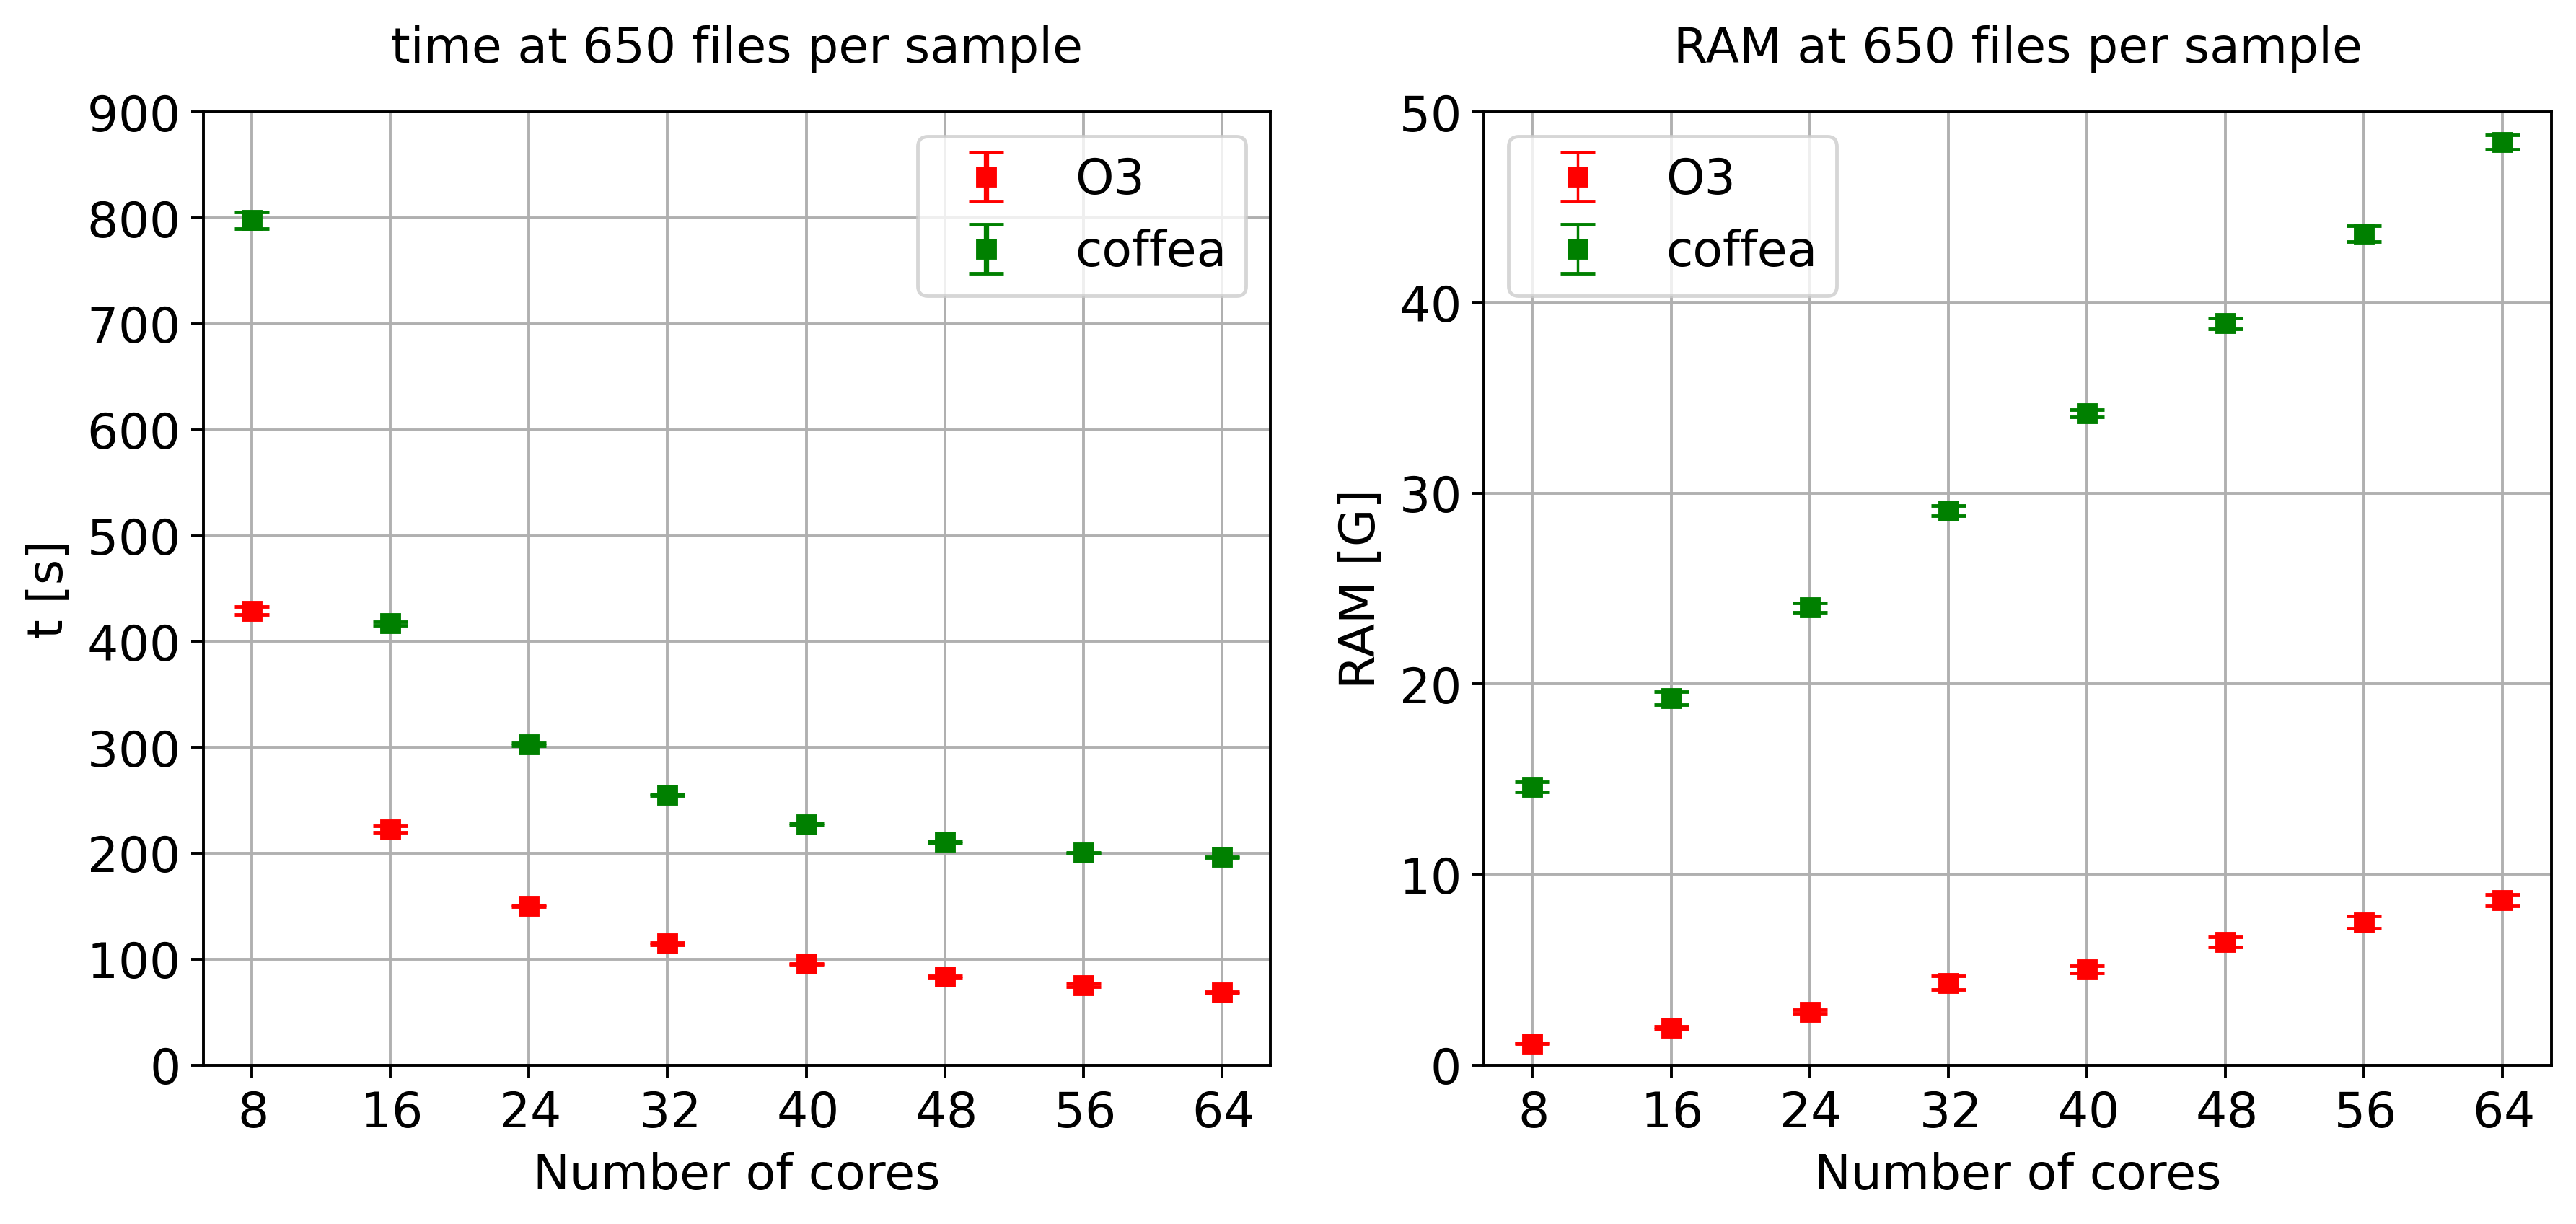

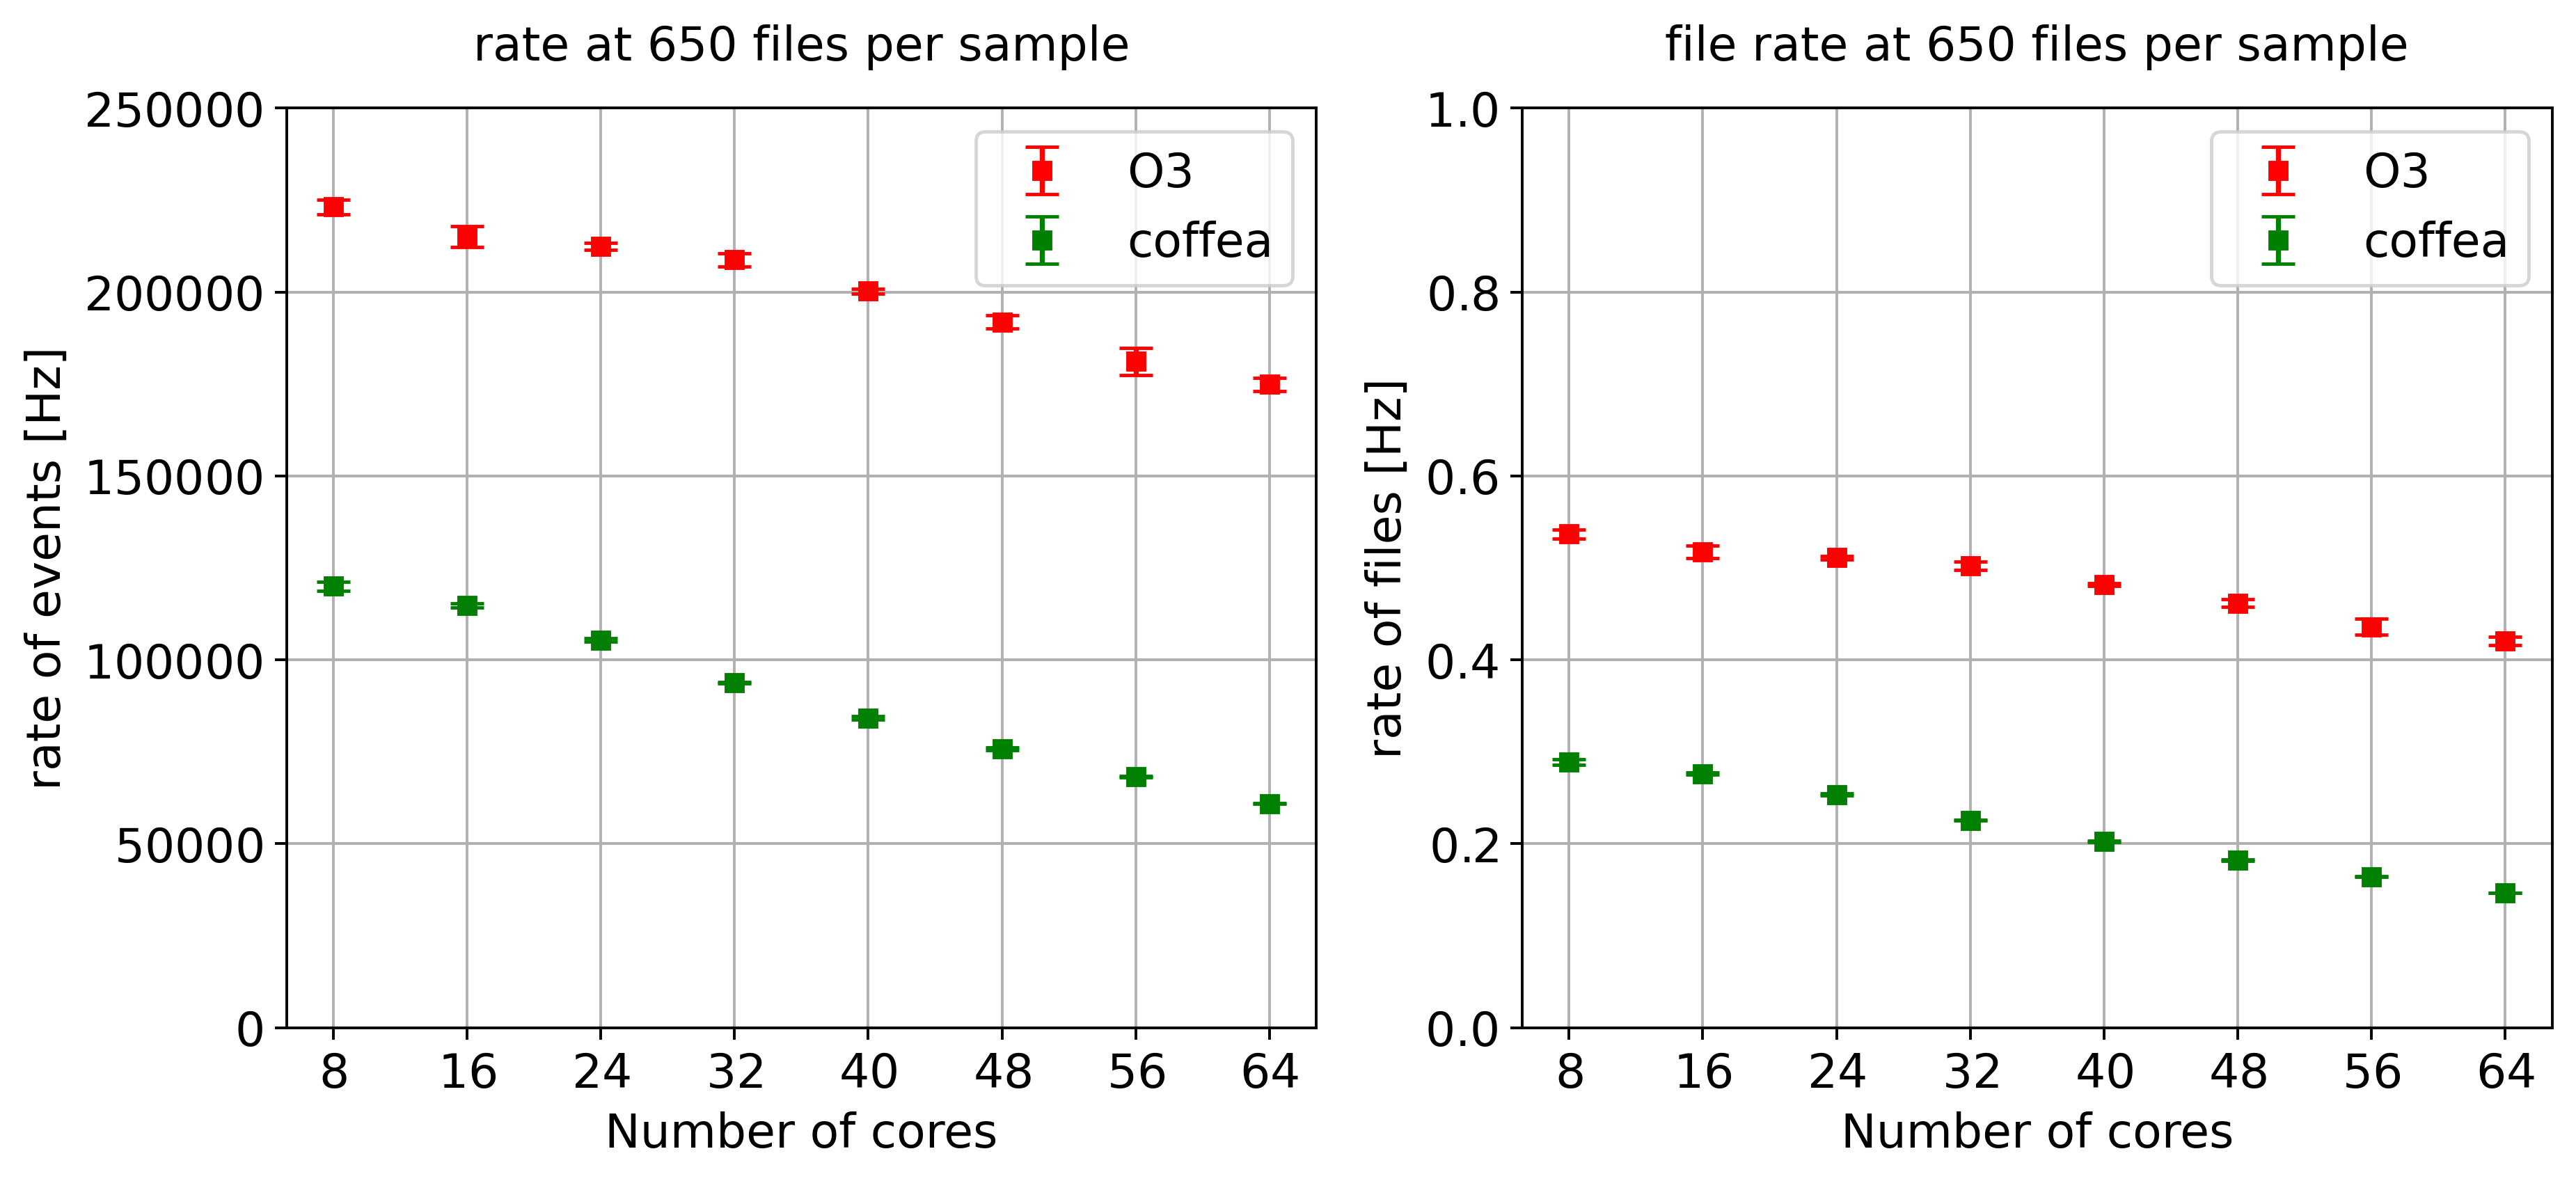

In [101]:
#fs = get_time_vs_ncores(400, ncores_range=range(16,65,16), subdir='old_size/', )
fs = get_vs_ncores(650)

In [96]:
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
# plt.rcParams["font.size"] = 12
plt.rcParams["figure.dpi"] = 350
plt.rcParams['xtick.labelsize'] = 'medium'
def get_vs_nfiles(ncores=64, nfiles_range=range(50, 650, 50), labels = ['O3', 'coffea'], subdir=''):
#     plt.style.use('_mpl-gallery')
    
    colors = ['r', 'g', 'b']
    colors = {labels[i]:colors[i] for i in range(len(labels))}
    
    fig, ax = plt.subplots(1,2, figsize=(12,5))
    
    timeax = ax[0]
    ramax = ax[1]
    timeax.ticklabel_format(axis='x', style='sci')
    
    fig_rate, axs = plt.subplots(1,2, figsize=(12,5)) 
    ax_rate = axs[0]
    ax_file = axs[1]
    
    
    
    n = nfiles_range
    nevts = []
    nfiles_tot = []
    
    for label in labels:
        
        t = []  
        ram = []
        for nfiles in n:
            path = f'benchmarks/{subdir}{nfiles}/{label}/{ncores}/*'
            files = glob.glob(path)
            time = []
            rss = []
            
            for i in range(len(files)):
                file = files[i]
                
                with open(file, 'r') as f:
                
                    if i == 0 and label=='O3':
                        for l in f.readlines():

                            if 'Total number of events:' in l:
                                val = int(l.split()[-1])
                                nevts.append(val)
                            if 'Total number of files:' in l:
                                val = int(l.split()[-1])    
                                nfiles_tot.append(val)   
                            
                    if 'coffea' in label:
                        if 'rss' in file:
                            line = f.readline()
                            val = line.split()[0]
                            rss.append(float(val))
                        else:
                            
                            for line in f.readlines():
                                if 'execution took' in line:  
                                    val = line.split()[2]
                                    time.append(float(val))
                    else:
                        for line in f.readlines():
                            if 'RunGraphs' in line and 'elapsed' in line:
                                val = float(line.split()[-2][0:-1])
                                time.append(val)
                            if 'maxresident' in line:
                                val = int(line.split()[-1].split('maxresident')[0])#/100000
                                rss.append(val)
                        
            t.append(time); ram.append(rss)

        t = np.array(t); ram = np.array(ram)/1e6
        
        timeax.errorbar(n, np.mean(t, axis=1), yerr=np.std(t, axis=1), label = label, marker='.', linestyle='', color=colors[label], capsize=5, markersize=10)
        ramax.errorbar(n, np.mean(ram, axis=1), yerr=np.std(ram, axis=1), label = label, marker='.', linestyle='', color=colors[label],linewidth=0.7, capsize=5, markersize=10)
        
        
        rate = np.array(nevts)[:,None]/np.array(n)[:,None]/t
        ax_rate.errorbar(n, np.mean(rate, axis=1), yerr=np.std(rate, axis=1), label = label, marker='.', linestyle='', color=colors[label], capsize=5, markersize=10)
        rate = np.array(nfiles_tot)[:,None]/np.array(n)[:,None]/t
        ax_file.errorbar(n, np.mean(rate, axis=1), yerr=np.std(rate, axis=1), label = label, marker='.', linestyle='', color=colors[label], capsize=5, markersize=10)
        
        
    timeax.set_xlabel('Number of files per sample')
    timeax.set_ylabel('t [s]')
    timeax.grid()
    timeax.set_xticks(n)
#     ax[0].set_yticks(list(range(0, 1100, 100)))
    #ax[0].yaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=False))
    timeax.legend()
    timeax.set_title(f'time at {ncores} cores', fontsize=14, x=0.5, y=1.03)
    timeax.set_ylim(0, 200)
 
    ax_rate.set_xlabel('Number of files per sample')
    ax_rate.set_ylabel('rate of event [Hz]')
    ax_rate.grid()
    ax_rate.set_xticks(n)
    ax_rate.legend()
    ax_rate.set_title(f'rate at {ncores} cores', fontsize=14, x=0.5, y=1.03)
    ax_rate.set_ylim(0, 25*1e4)

    
    ramax.set_xlabel('Number of files per sample')
    ramax.set_ylabel('RAM [G]')
    ramax.grid()
    ramax.set_xticks(n)
    ramax.legend()
    ramax.set_title(f'RAM at {ncores} cores', fontsize=14, x=0.5, y=1.03)
    ramax.set_ylim(0, 50)

    ax_file.set_xlabel('Number of files per sample')
    ax_file.set_ylabel('rate of files [Hz]')
    ax_file.grid()
    ax_file.set_xticks(n)
    ax_file.legend()
    ax_file.set_title(f'file rate at {ncores} cores', fontsize=14, x=0.5, y=1.03)
    ax_file.set_ylim(0, 0.6)
    
    
    return (fig, fig_rate)


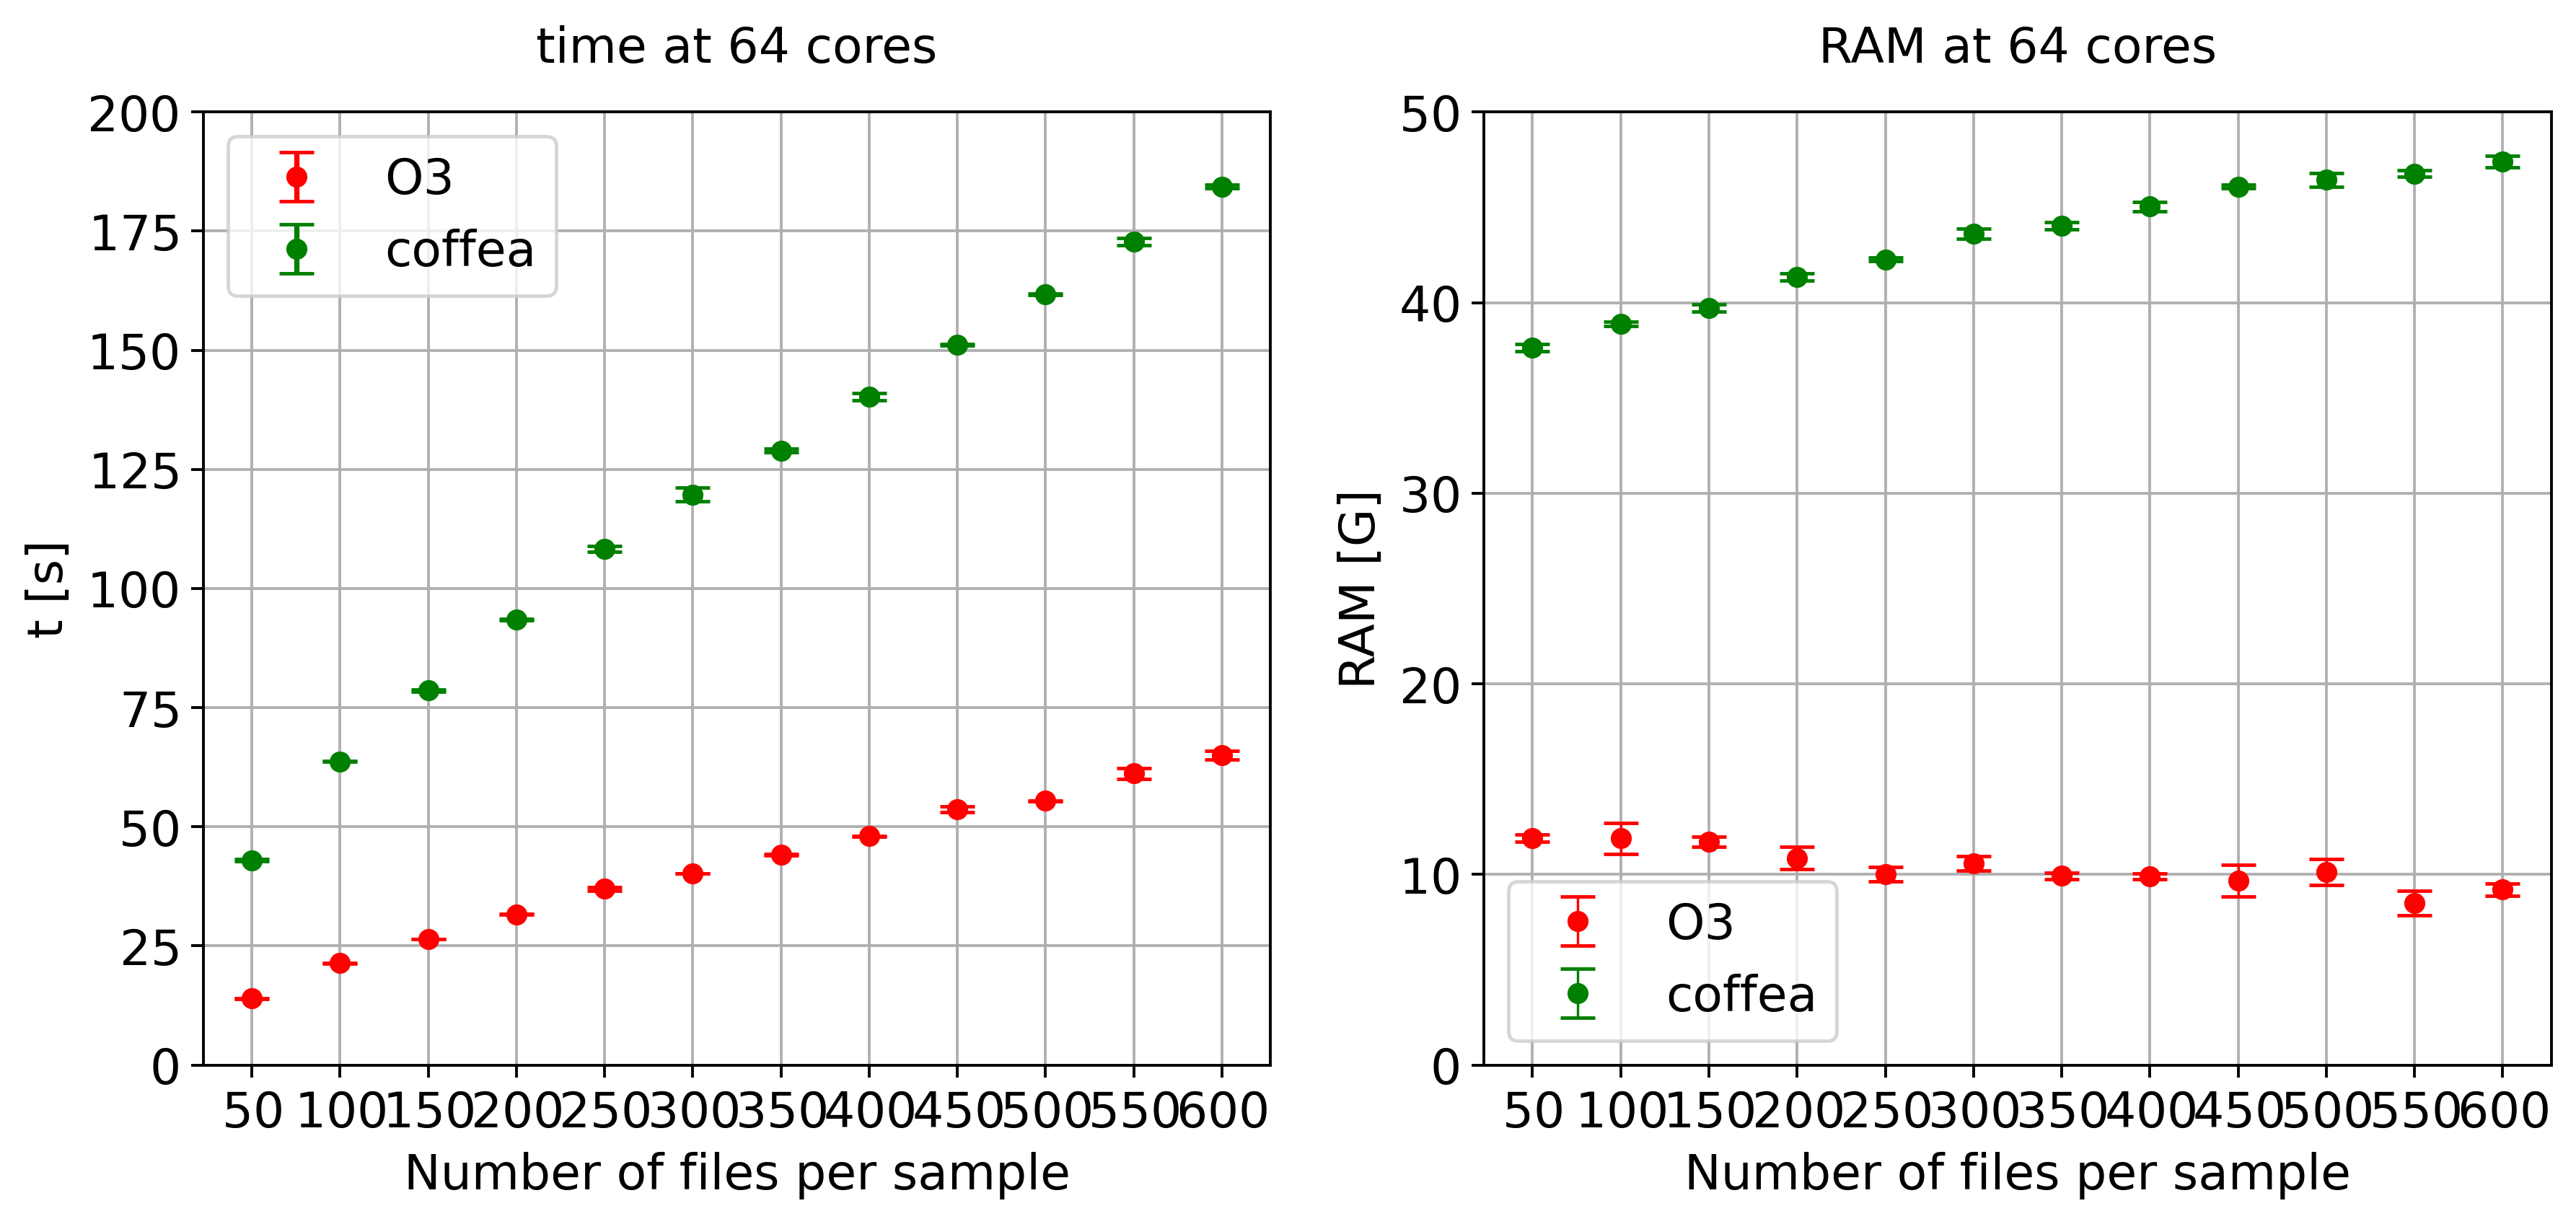

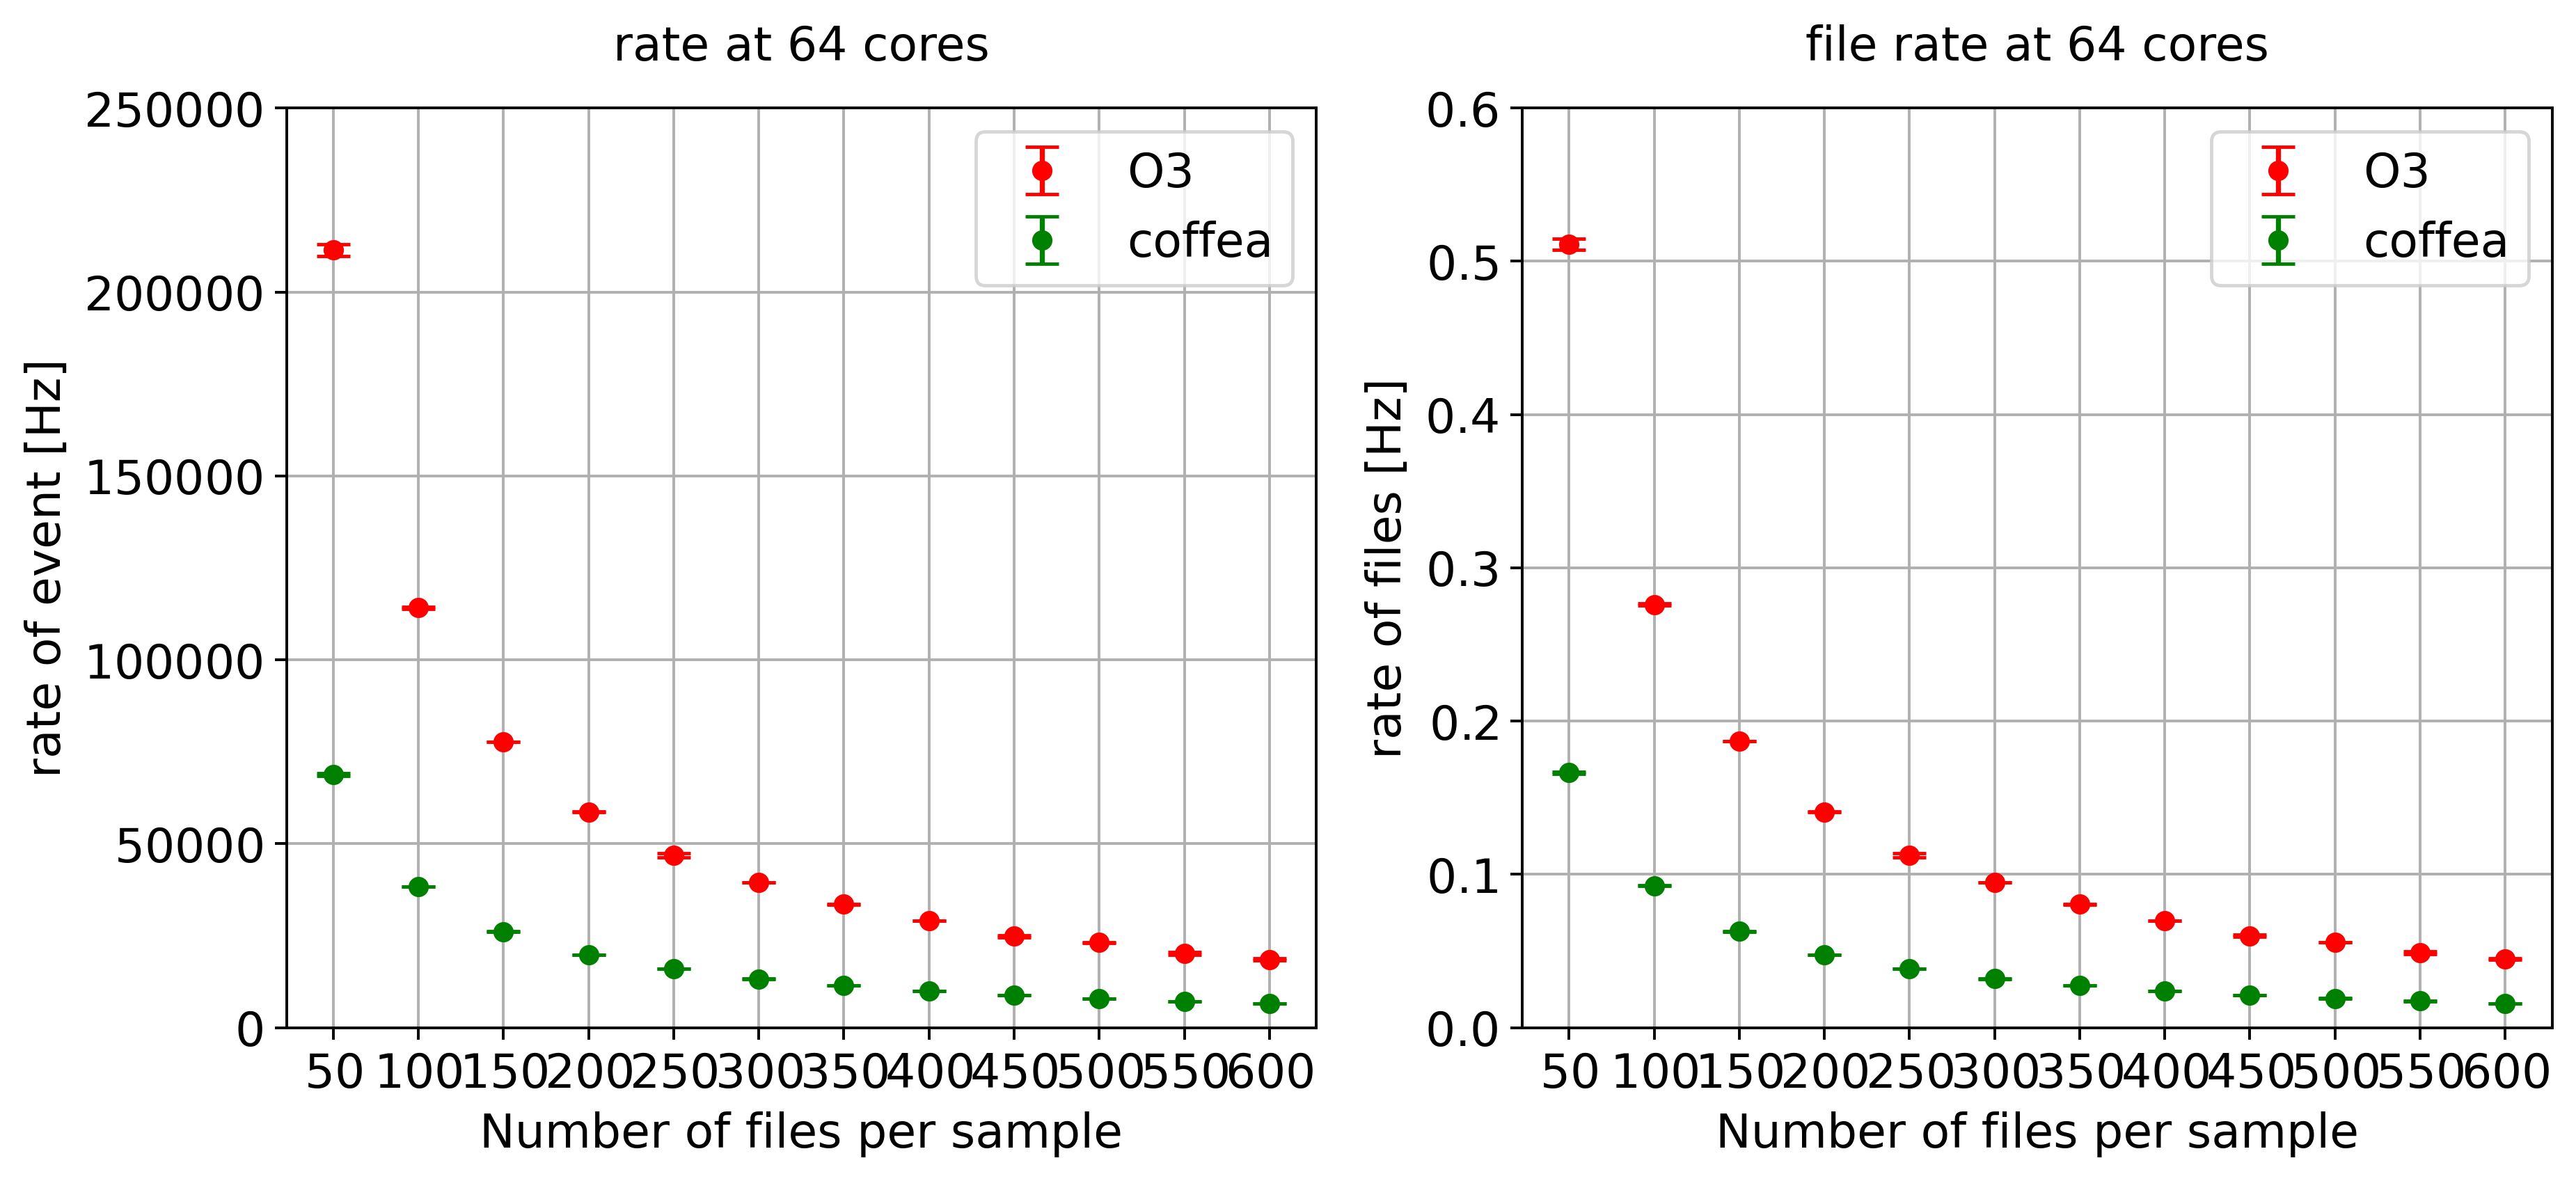

In [97]:
fs=get_vs_nfiles()